In [5]:
# Libraries
import os
import shutil
from email.mime import image

from PIL import Image
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cv2

In [9]:
IMG_DIR = "/media/haroune/Rage_USB_Ext4/Home/ci3/dl/aptos-dataset/aptos2019-blindness-detection/diabetic-retinopathy-detection/data/train_images_part"
DATA_DIR = "/media/haroune/Rage_USB_Ext4/Home/ci3/dl/aptos-dataset/aptos2019-blindness-detection/diabetic-retinopathy-detection/data"

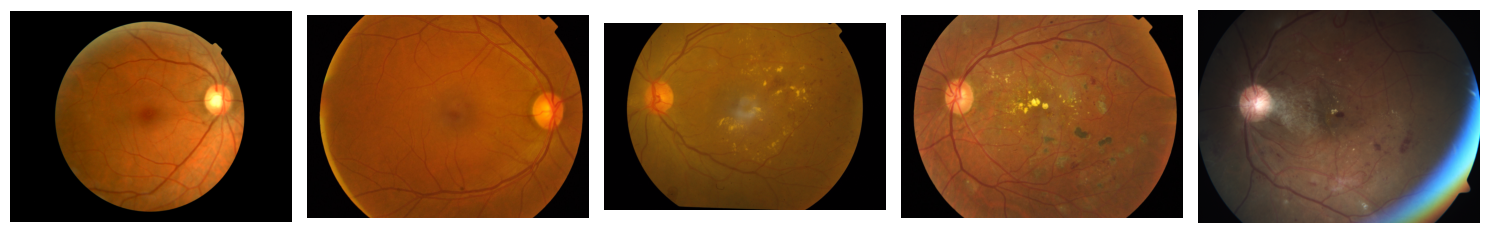

Copying d866c26d76f0 to samples/class_0/
Copying fdc685055659 to samples/class_0/
Copying cd48cfab4e44 to samples/class_0/
Copying 3232b34cbe99 to samples/class_0/
Copying 41345cec5957 to samples/class_0/
Copying 0a61bddab956 to samples/class_1/
Copying 3461dc601cc2 to samples/class_1/
Copying 849a91e9ab28 to samples/class_1/
Copying 09935d72892b to samples/class_1/
Copying 172df1330a60 to samples/class_1/
Copying cbf0394039f8 to samples/class_2/
Copying d10d315f123f to samples/class_2/
Copying 115e42dd6a81 to samples/class_2/
Copying a15652b22ab8 to samples/class_2/
Copying bcdc8db5423b to samples/class_2/
Copying e5197d77ec68 to samples/class_3/
Copying ceb32a193eff to samples/class_3/
Copying e01b7bac822b to samples/class_3/
Copying 97c6cb55866d to samples/class_3/
Copying 5b47043942f4 to samples/class_3/
Copying 16060f05d047 to samples/class_4/
Copying 555d0bef3c5b to samples/class_4/
Copying 9e2ba2b979f1 to samples/class_4/
Copying 26d9576e8043 to samples/class_4/
Copying ba0107fb

In [10]:
# pipeline of transformations
import os
IMG_DIR = "/media/haroune/Rage_USB_Ext4/Home/ci3/dl/aptos-dataset/aptos2019-blindness-detection/diabetic-retinopathy-detection/data/train_images"
os.chdir(IMG_DIR)

images_df = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))

no_dr_images = images_df[images_df['diagnosis'] == 0].id_code.values.tolist()
mild_images = images_df[images_df['diagnosis'] == 1].id_code.values.tolist()
moderate_images = images_df[images_df['diagnosis'] == 2].id_code.values.tolist()
severe_images = images_df[images_df['diagnosis'] == 3].id_code.values.tolist()
proliferative_images = images_df[images_df['diagnosis'] == 4].id_code.values.tolist()

images = [random.choice(imgs) for imgs in [no_dr_images, mild_images, moderate_images, severe_images, proliferative_images]]

fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # 1 row, 5 columns

for ax, img in zip(axes, images):
    ax.imshow(Image.open(".".join([img, "png"])))
    ax.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

# Storing samples
os.makedirs(os.path.join(DATA_DIR, "samples/class_0"), exist_ok=True)
os.makedirs(os.path.join(DATA_DIR, "samples/class_1"), exist_ok=True)
os.makedirs(os.path.join(DATA_DIR, "samples/class_2"), exist_ok=True)
os.makedirs(os.path.join(DATA_DIR, "samples/class_3"), exist_ok=True)
os.makedirs(os.path.join(DATA_DIR, "samples/class_4"), exist_ok=True)

# Copy class 0 samples
for img in random.sample(no_dr_images, 5):
    print(f"Copying {img} to samples/class_0/")
    shutil.copy(os.path.join(IMG_DIR, ".".join([img, "png"])), "../samples/class_0/" + ".".join([img, "png"]))

# Copy class 1 samples
for img in random.sample(mild_images, 5):
    print(f"Copying {img} to samples/class_1/")
    shutil.copy(os.path.join(IMG_DIR, ".".join([img, "png"])), "../samples/class_1/" + ".".join([img, "png"]))

# Copy class 2 samples
for img in random.sample(moderate_images, 5):
    print(f"Copying {img} to samples/class_2/")
    shutil.copy(os.path.join(IMG_DIR, ".".join([img, "png"])), "../samples/class_2/" + ".".join([img, "png"]))

# Copy class 3 samples
for img in random.sample(no_dr_images, 5):
    print(f"Copying {img} to samples/class_3/")
    shutil.copy(os.path.join(IMG_DIR, ".".join([img, "png"])), "../samples/class_3/" + ".".join([img, "png"]))

# Copy class 4 samples
for img in random.sample(no_dr_images, 5):
    print(f"Copying {img} to samples/class_4/")
    shutil.copy(os.path.join(IMG_DIR, ".".join([img, "png"])), "../samples/class_4/" + ".".join([img, "png"]))

# os.chdir(IMG_DIR)
# sample_images = random.sample(os.listdir(IMG_DIR), 10)
# for img in sample_images:
#     img = Image.open(img)
#     img.show()




## Exploratory Analysis

In [6]:
## Displaying the distribution of the contrast the images
import os
IMG_DIR = "/media/haroune/Rage_USB_Ext4/Home/ci3/dl/aptos-dataset/aptos2019-blindness-detection/diabetic-retinopathy-detection/data/train_images_preprocessed"
os.chdir(IMG_DIR)

contrast_values = []  # Using RMS contrast formula

for img_name in os.listdir():
    img = cv2.imread(img_name)
    mean_intensity = np.mean(img)
    # Compute RMS contrast
    contrast_rms = np.sqrt(np.mean((img - mean_intensity) ** 2))
    contrast_values.append(contrast_rms)

# Displaying the distribution of the contrasts
sns.histplot(contrast_values, bins=256, kde=False, color='black', stat='density')

# Add titles and labels
plt.title('Images Contrast Distribution')
plt.xlabel('Contrast')
plt.ylabel('Density')

# Display the plot
plt.show()

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

==> As we can see, the contrast of the images is too variant.

==> We will try to use generalized contrast enhancement techniques to enhance the images

## Preprocessing: CLAHE Histogram Equalization – OpenCV

Processing:  a75bab2463d4.png Class: 15    1
Name: diagnosis, dtype: int64
Original Image: 


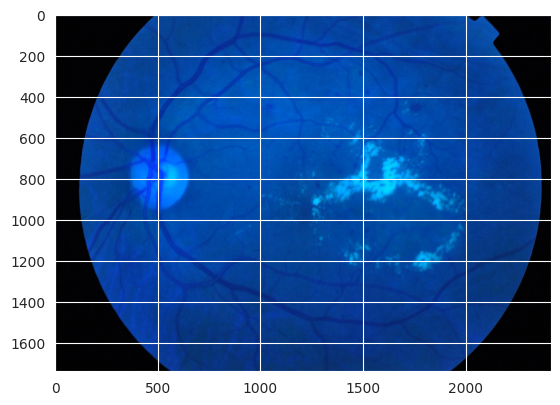

Enhanced Image: 


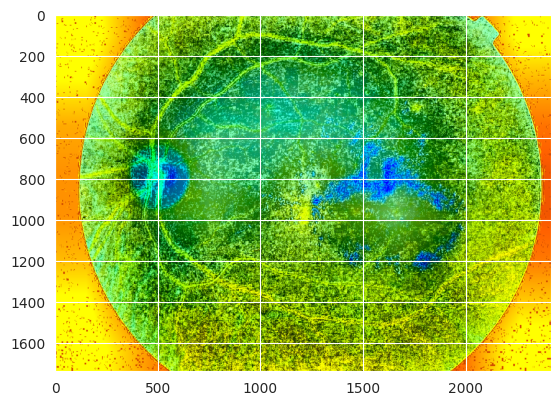

Processing:  a8c950a99107.png Class: 16    1
Name: diagnosis, dtype: int64



(eog:42167): EOG-WARNING **: 23:57:21.798: Thumbnail creation failed


Original Image: 


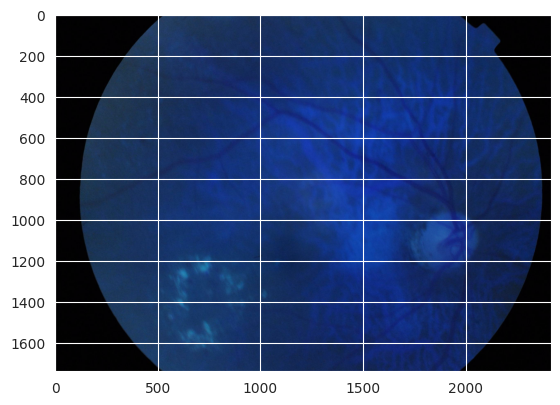

Enhanced Image: 


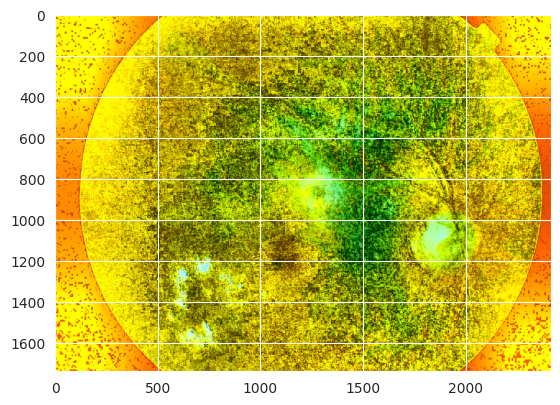

In [14]:
os.chdir(IMG_DIR)

def get_optimal_clip_limit(image):
    """
    Return the optimal clip_limit for the CLAHE Histogram Equalization of for the given
    image.
    ref: https://www.mdpi.com/2076-3417/13/19/10760 | 3.1. Finding Optimal Values
    :param image:
    :return:
    """
    original = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)  # To obtain the luminance/brightness channel
    original = cv2.resize(original, (500, 600))
    original_l, _, _ = cv2.split(original)
    max_variance = -np.inf
    optimal_clip_limit = 0

    for clip_limit in range(256):
        clahe = cv2.createCLAHE(clipLimit=clip_limit)
        clahe_transformed_l = clahe.apply(original_l)
        abs_diff = cv2.absdiff(original_l, clahe_transformed_l)
        variance = np.var(abs_diff)
        if variance > max_variance:
            max_variance = variance
            optimal_clip_limit = clip_limit

    return optimal_clip_limit

def calculate_sharpness_variance(image_l):
    """
    Calculate the sharpness variance of the image using the Laplacian edge-detection
    :param image_l: The luminance channel of the image
    :return:
    """

    laplacian = cv2.Laplacian(image_l, cv2.CV_64F)
    sharpness_var = laplacian.var()
    return sharpness_var

def get_optimal_alpha(image, oc):
    """
    Return the optimal additional brightness (alpha) for the CLAHE Histogram Equalization for the
    given image.
    :param image:
    :param oc: Optimal Cliplimit
    :return:
    """
    clahe = cv2.createCLAHE(clipLimit=oc)
    original = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)  # To obtain the luminance/brightness channel
    original_l, _, _ = cv2.split(original)
    max_variance = -np.inf
    optimal_alpha = 0

    for alpha in range(256):
        #print(f"==> Alpha: {alpha}")
        clahe_transformed_l = clahe.apply(original_l)
        clahe_transformed_l_with_alpha = cv2.add(clahe_transformed_l, alpha)
        sharpness_variance = calculate_sharpness_variance(clahe_transformed_l_with_alpha)
        if sharpness_variance > max_variance:
            max_variance = sharpness_variance
            optimal_alpha = alpha
    return optimal_alpha


def get_clahe_enhanced_image(image):
    """
    Return the enhanced image using the CLAHE Histogram equalization and the Laplacian edge-detection
    :param image: Image in BGR format
    :return:
    """
    oc = get_optimal_clip_limit(image)
    alpha = get_optimal_alpha(image, oc)

    # Splitting channels
    image_l, image_a, image_b = cv2.split(image)

    clahe = cv2.createCLAHE(clipLimit=oc)
    clahe_transformed_l = clahe.apply(image_l)
    clahe_transformed_l = cv2.add(clahe_transformed_l, alpha)

    # Merging channels
    res_image  = cv2.merge([clahe_transformed_l, image_a, image_b])
    return res_image



CLIP_LIMIT = 5
ALPHA = 30 # Brightness Addition
images_df = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
# img = os.listdir()[58]
# img = cv2.imread(img)
# img = cv2.resize(img, (500, 600))

for img in os.listdir()[15:17]:
    print("Processing: ", img, "Class:", images_df[images_df["id_code"] == img.split(".")[0]]["diagnosis"])
    img = cv2.imread(img)
    img_enh = get_clahe_enhanced_image(img)
    img_enh = cv2.cvtColor(img_enh, cv2.COLOR_LAB2BGR)
    img_enh_rgb = cv2.cvtColor(img_enh, cv2.COLOR_BGR2RGB)

    print("Original Image: ")
    plt.imshow(img)
    plt.show()
    print("Enhanced Image: ")
    plt.imshow(img_enh)
    plt.show()
    img = Image.fromarray(img_enh)
    img.show()

## 1. Highlighting Microaneurysms (MA):
- Early stage of DR
- Small **red** round dots on the retina virtue of vessel wall weakness
- Dots: sharp margins, size <= 125μm


In [13]:
import torch
from torchsummary import summary
from drdetector.config import *
from drdetector.cnn import *
from drdetector.load_chkpts import *

model_path = "/media/haroune/Rage_USB_Ext4/Home/ci3/dl/aptos-dataset/aptos2019-blindness-detection/diabetic-retinopathy-detection/models/cnn_resnet18_freeze_backbone_False_non_preprocessed.pth"

# Define your model

model = Classifier(len(CLASS_NAMES), backbone=BACKBONE, freeze_backbone=FREEZE_BACKBONE)
model, _, _ = load_checkpoint(model, model_path)

# Set the model to evaluation mode
model.eval()

# Specify the input size (Batch size is ignored by torchsummary)
input_size = (3, 224, 224)  # Example input for ResNet backbone (RGB image, 224x224)

# Display the summary
summary(model, input_size=input_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [2]:
import torch
print(f"CUDA IS AVAILABLE: {torch.cuda.is_available()}")

CUDA IS AVAILABLE: True
